In [1]:
import pandas as pd
import numpy as np
import json
import nltk
import re
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [2]:
%matplotlib inline
pd.set_option('display.max_colwidth', 300)

In [3]:
meta = pd.read_excel("test_articoli.xlsx", encoding="utf8", error_bad_lines=False)
meta = meta.replace(np.nan, '', regex=True)

In [4]:
meta.head()

,ID,Titolo,Url,Data,Abstract,Fonte,Tecnologia 1,Tecnologia 2,Tecnologia 3,Tech Building Block 1,...,Tech Building Block 3,Tech Cluster 1,Tech Cluster 2,Tech Cluster 3,Application 1,Application 2,Application 3,Trend 1,Trend 2,Trend 3
0,655dde2aeba917a7ca29388dbc3d77cb,"A Colorado Neighborhood Runs on a Self-Reliant, Clean Energy Grid",https://futurism.com/colorado-neighborhood-built-clean-energy-grid,,,Futurism,Renewable Energies,Biofactories,,Biofuels,...,,Technologies for smart communities,Technologies for environment,,Advaced Batteries,Environment & Energy Systems,,Low Emissions,Smart Grids,Electrification
1,ec86361327808e44cb6ede901b8ae718,A New Hole Is Forming in the Ozone Layer Over the Arctic,https://futurism.com/hole-ozone-layer-arctic,,,Futurism,Renewable Energies,,,Biofuels,...,,Technologies for environment,,,Carbon Removal Solutions,,,Low Emissions,,
2,5d1bc3bb303e8f80391489b304283930,Physicists Are Crashing Matter into Antimatter to Hunt a New Boson,https://futurism.com/physicists-crashing-matter-antimatter-hunt-new-boson,,"After a year of experimentation at Japan?s SuperKEKB particle accelerator, physicists say they?re getting close to finding a theorized but yet-undiscovered elementary particle. But their findings, published in the journal Physical Review Letters, have vastly tightened scientists ? understanding ...",Futurism,Nuclear Technologies,,,,...,,,,,,,,,,
3,127d3df10ab14f55bad5689e836f8091,Cybersecurity tactics for the coronavirus pandemic,https://www.mckinsey.com/business-functions/risk/our-insights/cybersecurity-tactics-for-the-coronavirus-pandemic,"Fri, 27 Mar 2020",,McKinsey Insight,,,,,...,,,,,Cybersecurity,,,,,
4,93d90b35b3c535b81dfb7cce4aadf409,"Meeting Japan's Paris Agreement targets""?more opportunity than cost",https://www.mckinsey.com/business-functions/sustainability/our-insights/meeting-japans-paris-agreement-targets-more-opportunity-than-cost,"Fri, 27 Mar 2020","Japan can meet its Paris Agreement targets in 2030 and 2050?but doing so will require carefully calibrating efforts across four sectors : power, industry, transport, and buildings.",McKinsey Insight,,,,,...,,,,,,,,Low Emissions,,


In [5]:
article_id = meta['ID']
len(article_id)

55

In [6]:
meta['Tecnologia 1'][0]

'Renewable Energies'

In [ ]:
#tech1 = []
#for i in meta['Tecnologia 1']:
#    tech1.append(i)
#
#tech2 = []
#for i in meta['Tecnologia 2']:
#    tech2.append(i)
#
#tech3 = []
#for i in meta['Tecnologia 3']:
#    tech3.append(i)

In [ ]:
#type(tech1)

In [7]:
tech1 = []
for i in meta['Tecnologia 1']:
    tech1.append(i)
#   if len(i): tech1.append(i + ', ')
#   else: tech1.append('')

#tech2 = []
#for i in meta['Tecnologia 2']:
#    if len(i): tech2.append(i + ', ')  
#    else: tech2.append('')
#
#tech3 = []
#for i in meta['Tecnologia 3']:
#    if len(i): tech3.append(i + ', ') 
#    else: tech3.append('')
#        
#len(tech1)

In [8]:
Tech = []
for i in range(len(tech1)):
    l = []
    if len(tech1[i]): l.append(tech1[i])
#    if len(tech2[i]): l.append(tech2[i])
#    if len(tech3[i]): l.append(tech3[i])
    Tech.append(list(l))
    
Tech[0]

['Renewable Energies']

In [9]:
# Create Tech Dataframe
tech = pd.DataFrame({'ID': article_id, 'Tech': Tech})
tech.head()

,ID,Tech
0,655dde2aeba917a7ca29388dbc3d77cb,[Renewable Energies]
1,ec86361327808e44cb6ede901b8ae718,[Renewable Energies]
2,5d1bc3bb303e8f80391489b304283930,[Nuclear Technologies]
3,127d3df10ab14f55bad5689e836f8091,[]
4,93d90b35b3c535b81dfb7cce4aadf409,[]


In [ ]:
## create dataframe
#tech = pd.DataFrame({'ID': article_id, 'tech1': tech1, 'tech2': tech2,'tech3': tech3})
##tech = pd.DataFrame({'tech1': tech1, 'tech2': tech2,'tech3': tech3})
#tech.head()

In [ ]:
#cols = ['tech1', 'tech2', 'tech3']
#tech['Tech'] = tech[cols].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)
#tech = tech.drop(cols, axis=1)
#tech.head()

In [10]:
articoli = meta[['ID','Titolo','Abstract']]
articoli = pd.merge(articoli, tech, on = 'ID')

In [11]:
articoli.head()

,ID,Titolo,Abstract,Tech
0,655dde2aeba917a7ca29388dbc3d77cb,"A Colorado Neighborhood Runs on a Self-Reliant, Clean Energy Grid",,[Renewable Energies]
1,ec86361327808e44cb6ede901b8ae718,A New Hole Is Forming in the Ozone Layer Over the Arctic,,[Renewable Energies]
2,5d1bc3bb303e8f80391489b304283930,Physicists Are Crashing Matter into Antimatter to Hunt a New Boson,"After a year of experimentation at Japan?s SuperKEKB particle accelerator, physicists say they?re getting close to finding a theorized but yet-undiscovered elementary particle. But their findings, published in the journal Physical Review Letters, have vastly tightened scientists ? understanding ...",[Nuclear Technologies]
3,127d3df10ab14f55bad5689e836f8091,Cybersecurity tactics for the coronavirus pandemic,,[]
4,93d90b35b3c535b81dfb7cce4aadf409,"Meeting Japan's Paris Agreement targets""?more opportunity than cost","Japan can meet its Paris Agreement targets in 2030 and 2050?but doing so will require carefully calibrating efforts across four sectors : power, industry, transport, and buildings.",[]


In [12]:
# remove samples with no tags
articoli['Tech'] = articoli['Tech'].apply(lambda y: '' if len(y)==0 else y)
articoli = articoli[~(articoli['Tech'].str.len() == 0)]
articoli = articoli[~(articoli['Abstract'].str.len() == 0)]

In [13]:
articoli.head()

,ID,Titolo,Abstract,Tech
2,5d1bc3bb303e8f80391489b304283930,Physicists Are Crashing Matter into Antimatter to Hunt a New Boson,"After a year of experimentation at Japan?s SuperKEKB particle accelerator, physicists say they?re getting close to finding a theorized but yet-undiscovered elementary particle. But their findings, published in the journal Physical Review Letters, have vastly tightened scientists ? understanding ...",[Nuclear Technologies]
5,254788edc7fc8f3f71263dcf339de972,A robot has figured out how to use tools,"Learning to use tools played a crucial role in the evolution of human intelligence . It may yet prove vital to the emergence of smarter , more capable robots , too. We really want to study that sort of generality , rather than a robot learning to use one tool. The researchers have previously sho...",[Dexterous Robotics]
6,8959e9eb58488e231ef020ddc6845275,AI's white guy problem isn't going away,"The numbers tell the tale of the AI industry's dire lack of diversity. Second , there's a disproportionate focus on ""fixing the pipeline? the idea of increasing the number of candidates from underrepresented groups that flow from schools to industry . This tends to underestimate other systemic d...",[Neural Networks]
7,e8aa5326c8905804e2165bfbf7364623,Alexa needs a robot body to escape the confines of today's AI,"??Alexa , why are n't you smarter ? Prasad explains that Alexa has ways to try to iron out such wrinkles? ? it knows your location and the time of day , and it can access every question you 've ever asked , as well as queries from other people in the same city .",[Brain Computer Interfaces]
8,4213fba75d8a2c9bca90e7cbd50c0c46,Boston Dynamics buys a better brain for its robots,"It is famous for making acrobatic , eerily lifelike , and somewhat accident-prone robots . Its systems allow a robot to figure out for itself where one box ends and another begins ( see ??Self-taught robot is ready to seize a warehouse job? ) .Boston Dynamics recently revealed its latest robot ...",[Dexterous Robotics]


In [14]:
articoli.describe()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1653, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


,ID,Titolo,Abstract,Tech
count,23,23,23,23
unique,22,22,22,12
top,4e4802c45592ed61ba6df847abf4a808,Machine learning is making pesto even more delicious,"What makes basil so good ? Similar technology is already being applied in some commercial farms , says Naveen Singla , who leads a data science team focused on crops at Bayer, a German multinational that acquired Monsanto last year . In the open environments it 's still a question how we can clo...",[Dexterous Robotics]
freq,2,2,2,4


In [15]:
# function for text cleaning 
def clean_text(text):
    # remove backslash-apostrophe 
    text = re.sub("\'", "", text) 
    # remove everything except alphabets 
    text = re.sub("[^a-zA-Z]"," ",text) 
    # remove whitespaces 
    text = ' '.join(text.split()) 
    # convert text to lowercase 
    text = text.lower() 
    
    return text

In [16]:
articoli['Abstract'] = articoli['Abstract'].apply(lambda x: clean_text(x))
articoli.head()

,ID,Titolo,Abstract,Tech
2,5d1bc3bb303e8f80391489b304283930,Physicists Are Crashing Matter into Antimatter to Hunt a New Boson,after a year of experimentation at japan s superkekb particle accelerator physicists say they re getting close to finding a theorized but yet undiscovered elementary particle but their findings published in the journal physical review letters have vastly tightened scientists understanding of the...,[Nuclear Technologies]
5,254788edc7fc8f3f71263dcf339de972,A robot has figured out how to use tools,learning to use tools played a crucial role in the evolution of human intelligence it may yet prove vital to the emergence of smarter more capable robots too we really want to study that sort of generality rather than a robot learning to use one tool the researchers have previously shown how a r...,[Dexterous Robotics]
6,8959e9eb58488e231ef020ddc6845275,AI's white guy problem isn't going away,the numbers tell the tale of the ai industrys dire lack of diversity second theres a disproportionate focus on fixing the pipeline the idea of increasing the number of candidates from underrepresented groups that flow from schools to industry this tends to underestimate other systemic disadvanta...,[Neural Networks]
7,e8aa5326c8905804e2165bfbf7364623,Alexa needs a robot body to escape the confines of today's AI,alexa why are nt you smarter prasad explains that alexa has ways to try to iron out such wrinkles it knows your location and the time of day and it can access every question you ve ever asked as well as queries from other people in the same city,[Brain Computer Interfaces]
8,4213fba75d8a2c9bca90e7cbd50c0c46,Boston Dynamics buys a better brain for its robots,it is famous for making acrobatic eerily lifelike and somewhat accident prone robots its systems allow a robot to figure out for itself where one box ends and another begins see self taught robot is ready to seize a warehouse job boston dynamics recently revealed its latest robot a wheeled platf...,[Dexterous Robotics]


In [17]:
articoli['Tech'][2]

['Nuclear Technologies']

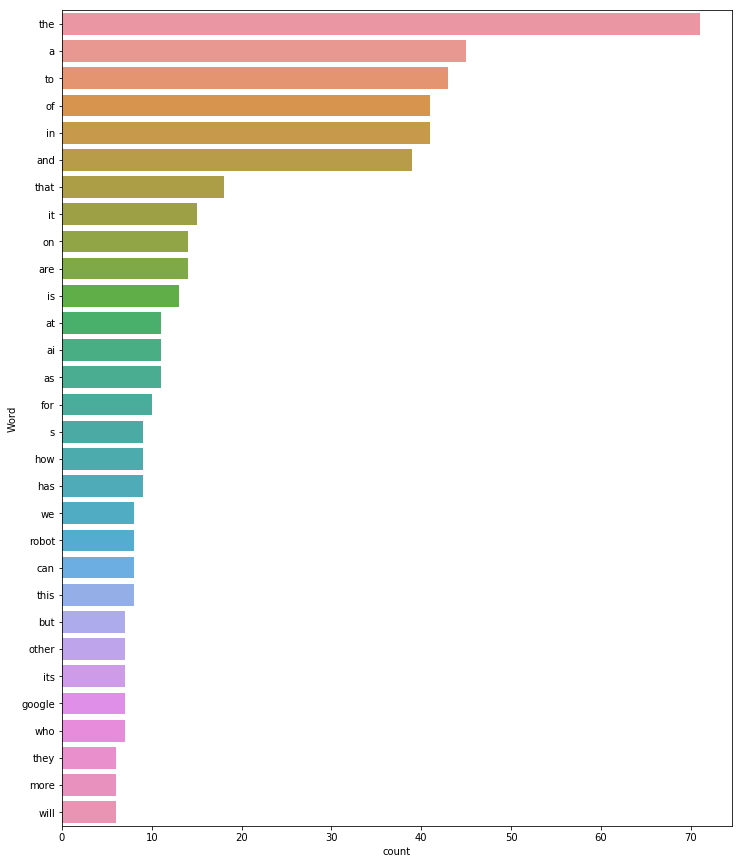

In [18]:
def freq_words(x, terms = 30): 
  all_words = ' '.join([text for text in x]) 
  all_words = all_words.split() 
  fdist = nltk.FreqDist(all_words) 
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())}) 
  
  # selecting top 20 most frequent words 
  d = words_df.nlargest(columns="count", n = terms) 
  
  # visualize words and frequencies
  plt.figure(figsize=(12,15)) 
  ax = sns.barplot(data=d, x= "count", y = "word") 
  ax.set(ylabel = 'Word') 
  plt.show()
  
# print 100 most frequent words 
freq_words(articoli['Abstract'], 30)

In [19]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\edoardo.esposito\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# function to remove stopwords
def remove_stopwords(text):
    no_stopword_text = [w for w in text.split() if not w in stop_words]
    return ' '.join(no_stopword_text)

articoli['Abstract'] = articoli['Abstract'].apply(lambda x: remove_stopwords(x))

In [21]:
articoli['Abstract'][2]

'year experimentation japan superkekb particle accelerator physicists say getting close finding theorized yet undiscovered elementary particle findings published journal physical review letters vastly tightened scientists understanding boson would behave making likely spot future'

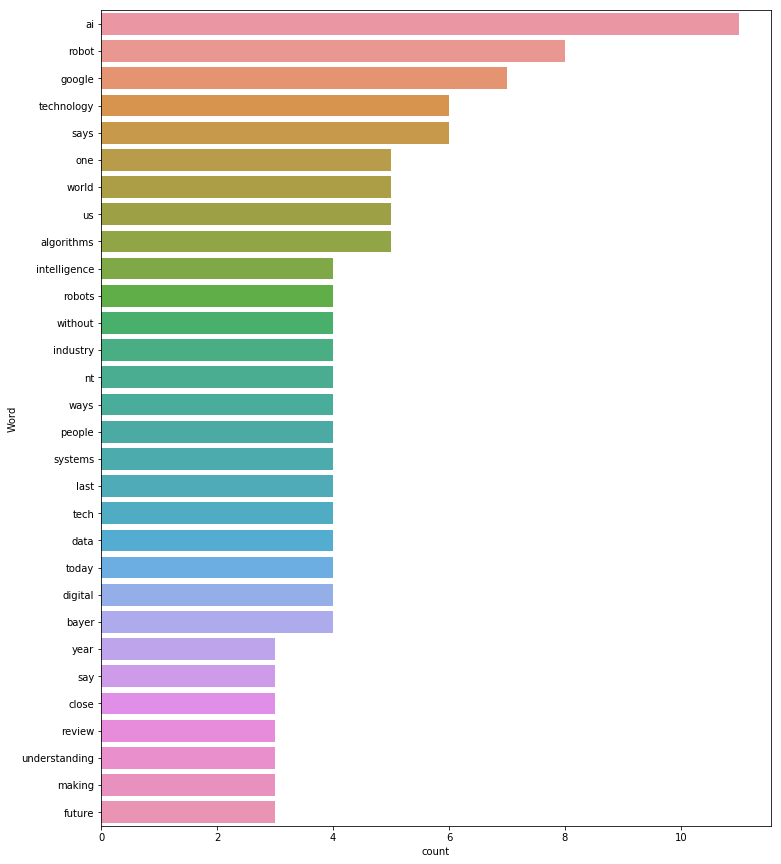

In [22]:
freq_words(articoli['Abstract'], 30)

In [ ]:
articoli['Tech'].head()

In [ ]:
articoli['Tech'][2]

In [23]:
# convert text to features
from sklearn.preprocessing import MultiLabelBinarizer

multilabel_binarizer = MultiLabelBinarizer()
multilabel_binarizer.fit(articoli['Tech'])

MultiLabelBinarizer(classes=None, sparse_output=False)

In [24]:
# transform target variable
y = multilabel_binarizer.transform(articoli['Tech'])

In [25]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=10000)

In [26]:
# split dataset into training and validation set
xtrain, xval, ytrain, yval = train_test_split(articoli['Abstract'], y, test_size=0.2, random_state=9)

In [27]:
xtrain.head()

24                                    greasy pizza box takeaway coffee cup plastic yogurt pots trash recycled cant really rely image alone tell whats going idea neat humans receive lot feedback touch says harri holopainen zenrobotics company based helsinki finland makes vision based robotic waste sorters
22                                                                                recently dazzling morning palm springs california vivienne sze took small stage deliver perhaps nerve racking presentation career szes lab exploring ways designing software better exploits properties existing computer chips
10                                                                                                                                        search planets orbiting stars reached industrial scale researchers say dramatically speeds process mining k data even spotted exoplanets experienced astronomers missed
6     numbers tell tale ai industrys dire lack diversity second theres disproporti

In [28]:
ytrain

array([[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]])

In [29]:
# create TF-IDF features
xtrain_tfidf = tfidf_vectorizer.fit_transform(xtrain)
xval_tfidf = tfidf_vectorizer.transform(xval)

In [30]:
#build prediction model
from sklearn.linear_model import LogisticRegression

# Binary Relevance
from sklearn.multiclass import OneVsRestClassifier

# Performance metric
from sklearn.metrics import f1_score

In [31]:
lr = LogisticRegression()
clf = OneVsRestClassifier(lr)

In [32]:
# fit model on train data
clf.fit(xtrain_tfidf, ytrain)

C:\Users\edoardo.esposito\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\multiclass.py:75: UserWarning: Label not 2 is present in all training examples.
  str(classes[c]))
C:\Users\edoardo.esposito\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\multiclass.py:75: UserWarning: Label not 4 is present in all training examples.
  str(classes[c]))


OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False),
                    n_jobs=None)

In [33]:
# make predictions for validation set
y_pred = clf.predict(xval_tfidf)

In [34]:
# it is the one-hot encoded form of the unique genre tags. We will have to find a way to convert it into tech tags.
y_pred[3]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [35]:
#convert the predicted arrays into movie genre tags
multilabel_binarizer.inverse_transform(y_pred)[3]

()

In [36]:
# evaluate performance
f1_score(yval, y_pred, average="micro")

0.0

In [37]:
# predict probabilities
y_pred_prob = clf.predict_proba(xval_tfidf)

In [38]:
t = 0.3 # threshold value
y_pred_new = (y_pred_prob >= t).astype(int)

In [39]:
# evaluate performance
f1_score(yval, y_pred_new, average="micro")

0.0

In [40]:
def infer_tags(q):
    q = clean_text(q)
    q = remove_stopwords(q)
    q_vec = tfidf_vectorizer.transform([q])
    q_pred = clf.predict(q_vec)
    return multilabel_binarizer.inverse_transform(q_pred)

In [41]:
for i in range(5): 
  k = xval.sample(1).index[0]
  print("Article: ", articoli['Abstract'][k], "\nPredicted tech: ", infer_tags(xval[k])), print("Actual tech: ",articoli['Tech'][k], "\n")

Article:  last wednesday us lawmakers introduced new bill represents one countrys first major efforts regulate ai though us alone endeavor uk france australia others recently drafted passed legislation hold tech companies accountable algorithms country unique opportunity shape ais global impact home silicon valley 
Predicted tech:  [()]
Actual tech:  ['Big Data'] 

Article:  alexa nt smarter prasad explains alexa ways try iron wrinkles knows location time day access every question ever asked well queries people city 
Predicted tech:  [()]
Actual tech:  ['Brain Computer Interfaces'] 

Article:  businesses nonprofits finding novel ways employ artificial intelligence developing world using tools improve agriculture yields infant health care entrepreneur earnings according speakers mit technology review emtech digital conference san francisco tuesday solomon assefa oversees ibm research labs kenya south africa said company using ai accurately predict crop yields specific regions based shif